In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import date, datetime, timezone
from workalendar.america import Brazil
cal = Brazil()

feriados = ['2015-01-01','2015-02-17','2015-04-03','2015-04-05','2015-04-21','2015-05-01','2015-06-04','2015-09-07',
        '2015-10-12','2015-11-02','2015-11-15','2015-12-25','2016-01-01','2016-02-09','2016-03-25','2016-03-27',
        '2016-04-21','2016-05-01','2016-05-26','2016-06-04','2016-09-07','2016-10-12','2016-11-02','2016-11-15',
        '2016-12-25','2017-01-01','2017-02-28','2017-04-14','2017-04-16','2017-04-21','2017-05-01','2017-05-26',
        '2017-06-15','2017-09-07','2017-10-12','2017-11-02','2017-11-15','2017-12-25','2018-01-01','2018-02-13',
        '2018-03-30','2018-04-01','2018-04-21','2018-05-01','2018-05-31','2018-09-07','2018-10-12','2018-11-02',
        '2018-11-15','2018-12-25','2019-01-01','2019-03-05','2019-04-19','2019-04-21','2019-05-01','2019-06-20',
        '2019-09-07','2019-10-12','2019-11-02','2019-11-15','2019-12-25']
feriados = pd.to_datetime(feriados, format='%Y-%m-%d')
feriados = pd.DataFrame({'data':feriados})

dados = pd.read_csv('./transactions.csv')
dados['data'] = pd.to_datetime(dados['data'], format='%d/%m/%Y')
df = pd.merge(dados, feriados, how='left', on='data', indicator = True)
dados['feriado'] = np.where(df['_merge'] == 'both', 1, 0)
dados['dia'] = (dados['data'].dt.day)
dados['mes'] = (dados['data'].dt.month)
dados['ano'] = (dados['data'].dt.year)
dados['diaDoAno'] = (dados['data'].dt.dayofyear)
dados['diaSemana'] = (dados['data'].dt.dayofweek)
dados['numSemanaMes'] = ((dados['data'].dt.day - 1) // 7 + 1)
dados['diaUtil'] = ((dados['diaSemana'] < 5) & (dados.feriado == 0))
dados['diaDeProducao'] = (((dados.diaSemana == 1) | (dados.diaSemana == 3)) & dados.diaUtil == True)
dados['dia5'] = 0
dados['dia10'] = 0

dias = np.array(dados['dia'].tolist())
meses = np.array(dados['mes'].tolist())
anos = np.array(dados['ano'].tolist())

for i in range(len(dados)):
    if(dados['data'][i] == pd.Timestamp(cal.add_working_days(date(anos[i], meses[i], 1), 5))):
        dados['dia5'][i] = 1
    if(dados['data'][i] == pd.Timestamp(cal.add_working_days(date(anos[i], meses[i], 1), 10))):
        dados['dia10'][i] = 1

dados['segDia5'] = ((dados['data'].dt.dayofweek == 0) & (dados['dia'] == 5) & (dados.feriado == 0))
dados['segDia10'] = ((dados['data'].dt.dayofweek == 0) & (dados['dia'] == 10) & (dados.feriado == 0))
dados['inicioSemana'] = (dados['diaSemana'] < 3)
dados['semanaAno'] = (dados['data'].dt.weekofyear)
#dados['inicioMes'] = (dados['data'].dt.is_month_start)
#dados['fimMes'] = (dados['data'].dt.is_month_end)

dados.dtypes

c:\users\ramon.nascimento\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\ramon.nascimento\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


data             datetime64[ns]
totalTrsc                 int64
feriado                   int32
dia                       int64
mes                       int64
ano                       int64
diaDoAno                  int64
diaSemana                 int64
numSemanaMes              int64
diaUtil                    bool
diaDeProducao              bool
dia5                      int64
dia10                     int64
segDia5                    bool
segDia10                   bool
inicioSemana               bool
semanaAno                 int64
dtype: object

In [90]:
#for i in range(len(dados)):
    #print(cal.add_working_days(date(anos[i], meses[i], 1), 5))
for i in range(len(dados)):
    if(dados['data'][i] == pd.Timestamp(cal.add_working_days(date(anos[i], meses[i], 1), 5))):
        dados['dia5'][i] = 1
    if(dados['data'][i] == pd.Timestamp(cal.add_working_days(date(anos[i], meses[i], 1), 10))):
        dados['dia10'][i] = 1

c:\users\ramon.nascimento\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
c:\users\ramon.nascimento\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [139]:
#type(dados['data'][12].to_pydatetime())
dados['data'][12] == pd.Timestamp(cal.add_working_days(datetime(2014, 6, 1), 10))
dados.head(25)

,data,totalTrsc,feriado,dia,mes,ano,diaDoAno,diaSemana,numSemanaMes,diaUtil,diaDeProducao,dia5,dia10,segDia5,segDia10,inicioSemana,semanaAno
0,2014-06-01,914608,0,1,6,2014,152,6,1,False,False,0,0,False,False,False,22
1,2014-06-02,11256628,0,2,6,2014,153,0,1,True,False,0,0,False,False,True,23
2,2014-06-03,9321025,0,3,6,2014,154,1,1,True,True,0,0,False,False,True,23
3,2014-06-04,8933395,0,4,6,2014,155,2,1,True,False,0,0,False,False,True,23
4,2014-06-05,10031023,0,5,6,2014,156,3,1,True,True,0,0,False,False,False,23
5,2014-06-06,11350673,0,6,6,2014,157,4,1,True,False,1,0,False,False,False,23
6,2014-06-07,1813088,0,7,6,2014,158,5,1,False,False,0,0,False,False,False,23
7,2014-06-08,924436,0,8,6,2014,159,6,2,False,False,0,0,False,False,False,23
8,2014-06-09,12572627,0,9,6,2014,160,0,2,True,False,0,0,False,False,True,24
9,2014-06-10,11274298,0,10,6,2014,161,1,2,True,True,0,0,False,False,True,24


In [140]:
trocar = {
        True : 1,
        False : 0
    }
dados.diaUtil = dados.diaUtil.map(trocar)
#dados.inicioMes = dados.inicioMes.map(trocar)
#dados.fimMes = dados.fimMes.map(trocar)
dados.inicioSemana = dados.inicioSemana.map(trocar)
dados.segDia5 = dados.segDia5.map(trocar)
dados.segDia10 = dados.segDia10.map(trocar)
#dados.dia5 = dados.dia5.map(trocar)
#dados.dia10 = dados.dia10.map(trocar)
dados.diaDeProducao = dados.diaDeProducao.map(trocar)

In [141]:
dados.corr().round(4)

,totalTrsc,feriado,dia,mes,ano,diaDoAno,diaSemana,numSemanaMes,diaUtil,diaDeProducao,dia5,dia10,segDia5,segDia10,inicioSemana,semanaAno
totalTrsc,1.0000,-0.1760,-0.0622,-0.0399,0.5790,-0.0454,-0.5733,-0.0658,0.6867,0.2434,0.1073,0.0935,0.0648,0.0881,0.4100,-0.0421
feriado,-0.1760,1.0000,-0.0674,-0.0189,0.0394,-0.0243,0.0019,-0.0633,-0.2642,-0.1088,-0.0327,0.0032,-0.0118,-0.0110,-0.0169,-0.0025
dia,-0.0622,-0.0674,1.0000,0.0139,-0.0165,0.0968,-0.0002,0.9740,0.0182,0.0094,-0.1651,-0.0132,-0.0807,-0.0401,0.0007,0.0719
mes,-0.0399,-0.0189,0.0139,1.0000,-0.2795,0.9965,0.0016,0.0155,0.0006,0.0050,-0.0017,-0.0017,0.0042,0.0393,-0.0010,0.9722
ano,0.5790,0.0394,-0.0165,-0.2795,1.0000,-0.2799,-0.0009,-0.0171,-0.0111,-0.0077,0.0026,0.0026,0.0102,0.0014,-0.0001,-0.2803
diaDoAno,-0.0454,-0.0243,0.0968,0.9965,-0.2799,1.0000,0.0016,0.0963,0.0020,0.0057,-0.0154,-0.0028,-0.0023,0.0357,-0.0009,0.9737
diaSemana,-0.5733,0.0019,-0.0002,0.0016,-0.0009,0.0016,1.0000,-0.0019,-0.7542,-0.3067,-0.0506,-0.0629,-0.0997,-0.0933,-0.8661,-0.0002
numSemanaMes,-0.0658,-0.0633,0.9740,0.0155,-0.0171,0.0963,-0.0019,1.0000,0.0199,0.0062,-0.1348,0.0161,-0.0888,-0.0339,0.0019,0.0720
diaUtil,0.6867,-0.2642,0.0182,0.0006,-0.0111,0.0020,-0.7542,0.0199,1.0000,0.4119,0.1238,0.1105,0.0446,0.0417,0.5297,-0.0002
diaDeProducao,0.2434,-0.1088,0.0094,0.0050,-0.0077,0.0057,-0.3067,0.0062,0.4119,1.0000,-0.0240,-0.0310,-0.0410,-0.0383,0.0881,0.0073


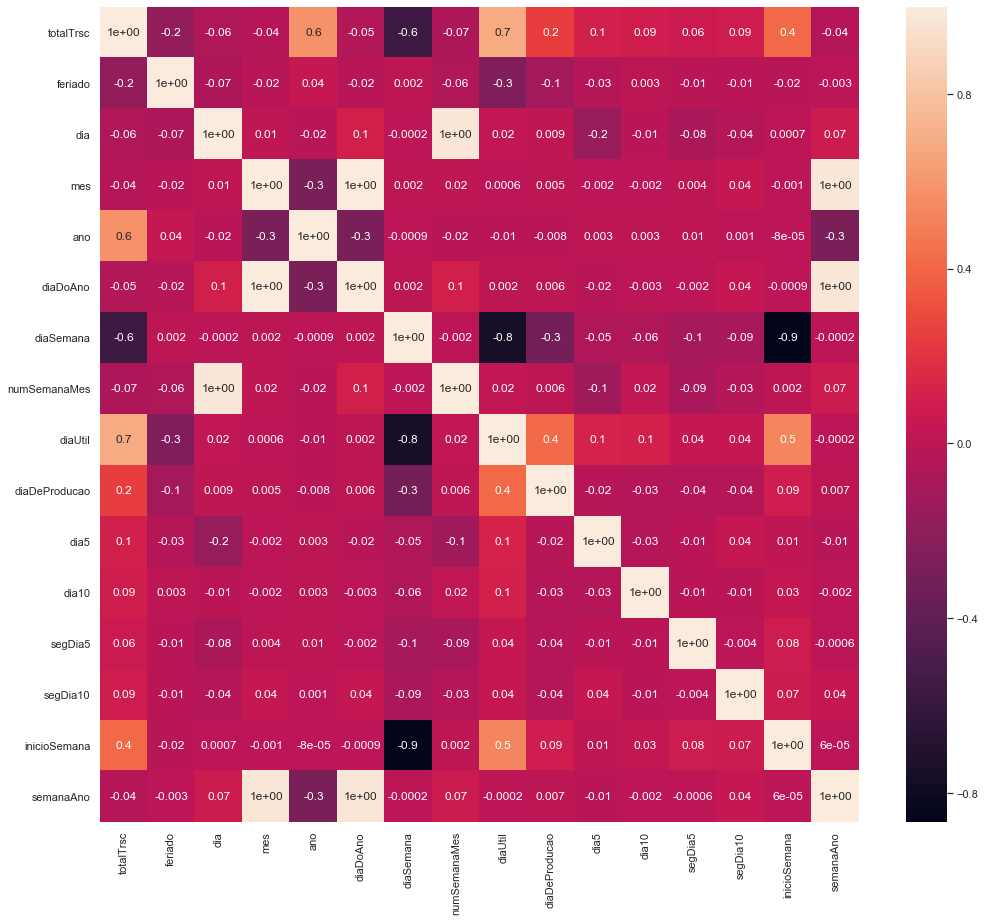

In [142]:
import seaborn as sns
plt.figure(figsize=(17,15))
sns.heatmap(dados.corr(), annot = True, fmt = '.1')

In [239]:
x = dados[['feriado', 'dia', 'mes', 'ano', 'diaDoAno', 'diaSemana', 'numSemanaMes', 'diaUtil', 'segDia5', 'segDia10', 'diaDeProducao', 'dia5', 'dia10', 'inicioSemana', 'semanaAno']]
y = dados['totalTrsc']
len(x), len(y)

(1813, 1813)

In [233]:
df = dados.loc[dados.data > '2016-12-31']
x = df[['feriado', 'dia', 'mes', 'ano', 'diaDoAno', 'diaSemana', 'numSemanaMes', 'diaUtil', 'segDia5', 'segDia10', 'diaDeProducao', 'dia5', 'dia10', 'inicioSemana', 'semanaAno']]
y = df['totalTrsc']
len(x), len(y)

(868, 868)

In [240]:
from sklearn.model_selection import train_test_split

SEED = 5
np.random.seed(SEED)
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.33, random_state = SEED)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(x_treino), len(x_teste)))

Treinaremos com 1214 elementos e testaremos com 599 elementos


In [241]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

lr_model = LinearRegression()
lr_model.fit(x_treino, y_treino)
print('R² = {}'.format(lr_model.score(x_treino, y_treino).round(3)))
y_previsto = lr_model.predict(x_teste)
print('R² = %s' % metrics.r2_score(y_teste, y_previsto).round(3))

R² = 0.855
R² = 0.848


In [242]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from lightgbm import LGBMRegressor

lgb_model = LGBMRegressor()
lgb_model.fit(x_treino, y_treino)
print('R² = {}'.format(lgb_model.score(x_treino, y_treino).round(3)))
y_previsto = lgb_model.predict(x_teste)
print('R² = %s' % metrics.r2_score(y_teste, y_previsto).round(3))

R² = 0.985
R² = 0.97


In [243]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost.sklearn import XGBRegressor

xgb_model = XGBRegressor()
xgb_model.fit(x_treino, y_treino)
print('R² = {}'.format(xgb_model.score(x_treino, y_treino).round(3)))
y_previsto = xgb_model.predict(x_teste)
print('R² = %s' % metrics.r2_score(y_teste, y_previsto).round(3))

[17:15:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R² = 0.973
R² = 0.957


c:\users\ramon.nascimento\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [244]:
lr_pred = lr_model.predict(x_teste)
lgb_pred = lgb_model.predict(x_teste)
xgb_pred = xgb_model.predict(x_teste)

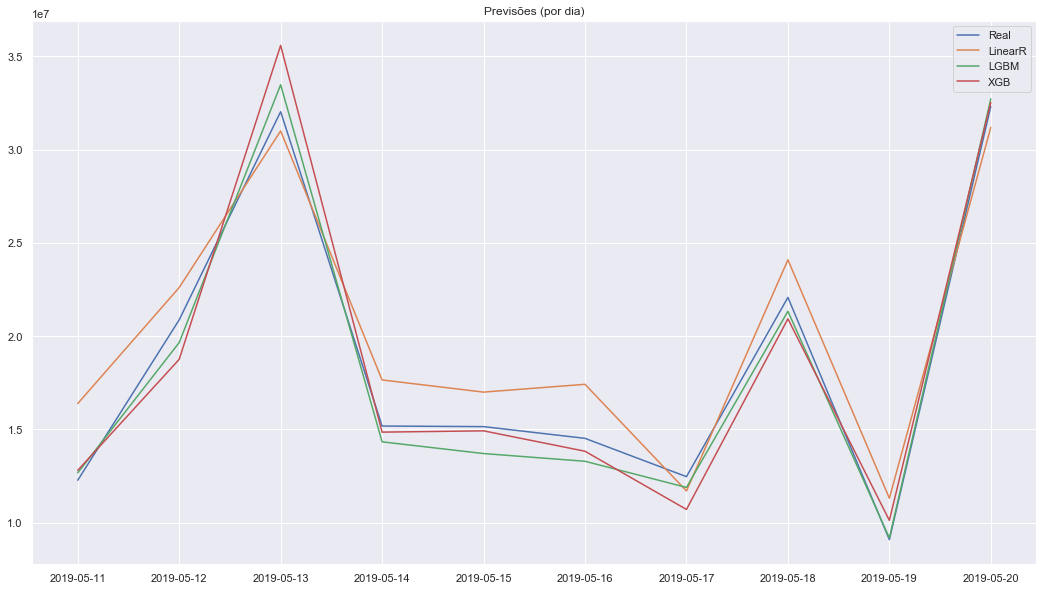

In [245]:
plt.figure(figsize=(18, 10))
#plt.plot(dados.data[-35:], dados.totalTrsc[-35:])
plt.plot(dados.data[-10:], y_teste[-10:], label='Real')
plt.plot(dados.data[-10:], lr_pred[-10:], label='LinearR')
plt.plot(dados.data[-10:], lgb_pred[-10:], label='LGBM')
plt.plot(dados.data[-10:], xgb_pred[-10:], label='XGB')
plt.title('Previsões (por dia)')
plt.legend()
plt.grid(True)
plt.show()

In [246]:
feriado = [0,0,0,0,0,0,0,0,0,0,0]
dia = [4,5,6,7,8,9,10,11,12,13,14]
mes = [8,8,8,8,8,8,8,8,8,8,8]
ano = [2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019]
diaDoAno = [216,217,218,219,220,221,222,223,224,225,226]
diaSemana = [6,0,1,2,3,4,5,6,0,1,2]
numSemanaMes = [2,2,2,2,2,2,2,3,3,3,3]
diaUtil = [0,1,1,1,1,1,0,0,1,1,1]
diaDeProducao = [0,0,1,0,1,0,0,0,0,1,0]
dia5 = [0,0,0,1,0,0,0,0,0,0,0]
dia10 = [0,0,0,0,0,0,0,0,0,0,10]
segDia5 = [0,1,0,0,0,0,0,0,0,0,0]
segDia10 = [0,0,0,0,0,0,0,0,0,0,0]
inicioSemana = [0,1,1,1,0,0,0,0,1,1,1]
semanaAno = [32,32,32,32,32,32,32,32,33,33,33]
#inicioMes = [0,0,0,0,0,0]
#fimMes = [0,0,0,0,0,0]

entrada = []
lr_predict = []
lgb_predict = []
for i in range(len(dia)):
    entrada.append([[feriado[i], dia[i], mes[i], ano[i], diaDoAno[i], diaSemana[i], numSemanaMes[i], diaUtil[i], segDia5[i], segDia10[i], diaDeProducao[i], dia5[i], dia10[i], inicioSemana[i], semanaAno[i]]])
    lr_predict.append(int(lr_model.predict(entrada[i])[0]))
    lgb_predict.append(int(lgb_model.predict(entrada[i])[0]))
    #print('Dia: {:02d} LinearRegression: {}'.format(dia[i], lr_predict[i]))
    print('Dia: {:02d} LGBRegression: {}'.format(dia[i], lgb_predict[i]))

Dia: 04 LGBRegression: 7892456
Dia: 05 LGBRegression: 46388551
Dia: 06 LGBRegression: 44480017
Dia: 07 LGBRegression: 44983479
Dia: 08 LGBRegression: 42029586
Dia: 09 LGBRegression: 42166983
Dia: 10 LGBRegression: 11192030
Dia: 11 LGBRegression: 7574739
Dia: 12 LGBRegression: 43302388
Dia: 13 LGBRegression: 38797039
Dia: 14 LGBRegression: 39425935


In [247]:
df = pd.DataFrame([4,5,6,7,8,9,10,11,12,13,14], columns=['dia'])
df['qtdReal'] = [7792203,51742741,47090367,46922766,41351522,43529566,14116623,8261583,56992828,41670691,0]
df['qtdPrev'] = lgb_predict
df

,dia,qtdReal,qtdPrev
0,4,7792203,7892456
1,5,51742741,46388551
2,6,47090367,44480017
3,7,46922766,44983479
4,8,41351522,42029586
5,9,43529566,42166983
6,10,14116623,11192030
7,11,8261583,7574739
8,12,56992828,43302388
9,13,41670691,38797039


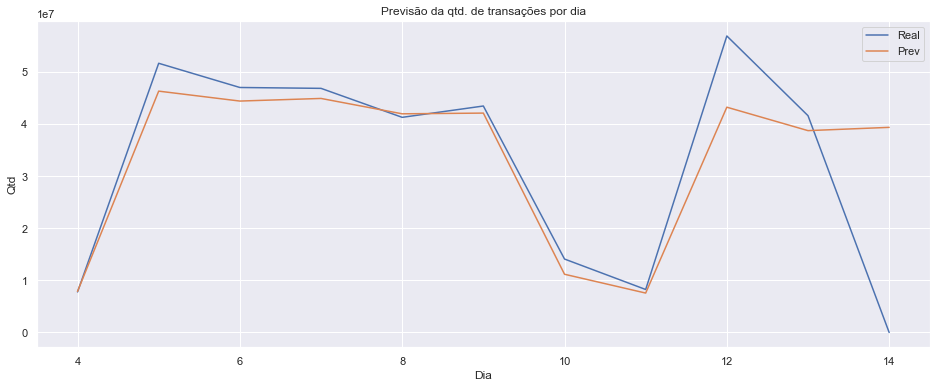

In [248]:
import seaborn as sns
sns.set(style='darkgrid')

plt.figure(figsize=(16, 6))
ax = sns.lineplot(x='dia', y='qtdReal', data=df, label='Real')
ax = sns.lineplot(x='dia', y='qtdPrev', data=df, label='Prev')
ax.set_title('Previsão da qtd. de transações por dia')
ax.set_xlabel('Dia')
ax.set_ylabel('Qtd')
plt.legend()

ax = ax

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import date, datetime, timezone
from workalendar.america import Brazil
cal = Brazil()

dfMensal = pd.read_csv('./totalMensal.csv', sep=';')
dfMensal['data'] = pd.to_datetime(dfMensal['data'], format='%Y-%m-%d')
dfMensal['mes'] = (dfMensal['data'].dt.month)
dfMensal['ano'] = (dfMensal['data'].dt.year)
dfMensal['qtdDias'] = (dfMensal['data'].dt.day)
dfMensal['sMov'] = ((dfMensal['mes'] > 9) | (dfMensal['mes'] < 4) == True)
dfMensal['diasUteis19'] = 0
dfMensal['diasUteis20'] = 0
dfMensal['diasUteis21'] = 0
dfMensal['diasUteis22'] = 0

dias = np.array(dfMensal['qtdDias'].tolist())
meses = np.array(dfMensal['mes'].tolist())
anos = np.array(dfMensal['ano'].tolist())

for i in range(len(dfMensal)):
    #print(cal.get_working_days_delta(date(anos[i],meses[i],1), date(anos[i],meses[i],dias[i])))
    #if(cal.get_working_days_delta(date(anos[i],meses[i],1), date(anos[i],meses[i],dias[i])) == 18):
        #dfMensal['diasUteis18'][i] = 1
    if(cal.get_working_days_delta(date(anos[i],meses[i],1), date(anos[i],meses[i],dias[i])) == 19):
        dfMensal['diasUteis19'][i] = 1
    elif(cal.get_working_days_delta(date(anos[i],meses[i],1), date(anos[i],meses[i],dias[i])) == 20):
        dfMensal['diasUteis20'][i] = 1
    elif(cal.get_working_days_delta(date(anos[i],meses[i],1), date(anos[i],meses[i],dias[i])) == 21):
        dfMensal['diasUteis21'][i] = 1
    else:
        dfMensal['diasUteis22'][i] = 1
    #else:
        #dfMensal['diasUteis23'][i] = 1
        
#for i in range(len(dfMensal)):
    #print(dias[i])
#dfMensal.dtypes

dfMensal.head()

c:\users\ramon.nascimento\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\ramon.nascimento\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\ramon.nascimento\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\ramon.nascimento\appda

,data,total,mes,ano,qtdDias,sMov,diasUteis19,diasUteis20,diasUteis21,diasUteis22
0,2016-01-31,303836828,1,2016,31,True,0,1,0,0
1,2016-02-29,305828523,2,2016,29,True,0,1,0,0
2,2016-03-31,345481507,3,2016,31,True,0,0,0,1
3,2016-04-30,335871285,4,2016,30,False,1,0,0,0
4,2016-05-31,356812410,5,2016,31,False,0,0,0,1


In [2]:
trocar = {
        True : 1,
        False : 0
    }
dfMensal.sMov = dfMensal.sMov.map(trocar)

In [3]:
dfMensal.corr().round(4)

,total,mes,ano,qtdDias,sMov,diasUteis19,diasUteis20,diasUteis21,diasUteis22
total,1.0000,0.1118,0.9084,0.1193,-0.1024,-0.0332,-0.1984,0.0586,0.1522
mes,0.1118,1.0000,-0.1915,0.2473,-0.0680,0.1569,0.0196,0.1209,-0.2681
ano,0.9084,-0.1915,1.0000,-0.0752,-0.0371,-0.0295,-0.1051,0.0038,0.1154
qtdDias,0.1193,0.2473,-0.0752,1.0000,-0.0990,-0.6082,0.0158,0.0837,0.4799
sMov,-0.1024,-0.0680,-0.0371,-0.0990,1.0000,0.1736,0.0691,-0.0452,-0.1824
diasUteis19,-0.0332,0.1569,-0.0295,-0.6082,0.1736,1.0000,-0.3016,-0.3016,-0.4074
diasUteis20,-0.1984,0.0196,-0.1051,0.0158,0.0691,-0.3016,1.0000,-0.2647,-0.3575
diasUteis21,0.0586,0.1209,0.0038,0.0837,-0.0452,-0.3016,-0.2647,1.0000,-0.3575
diasUteis22,0.1522,-0.2681,0.1154,0.4799,-0.1824,-0.4074,-0.3575,-0.3575,1.0000


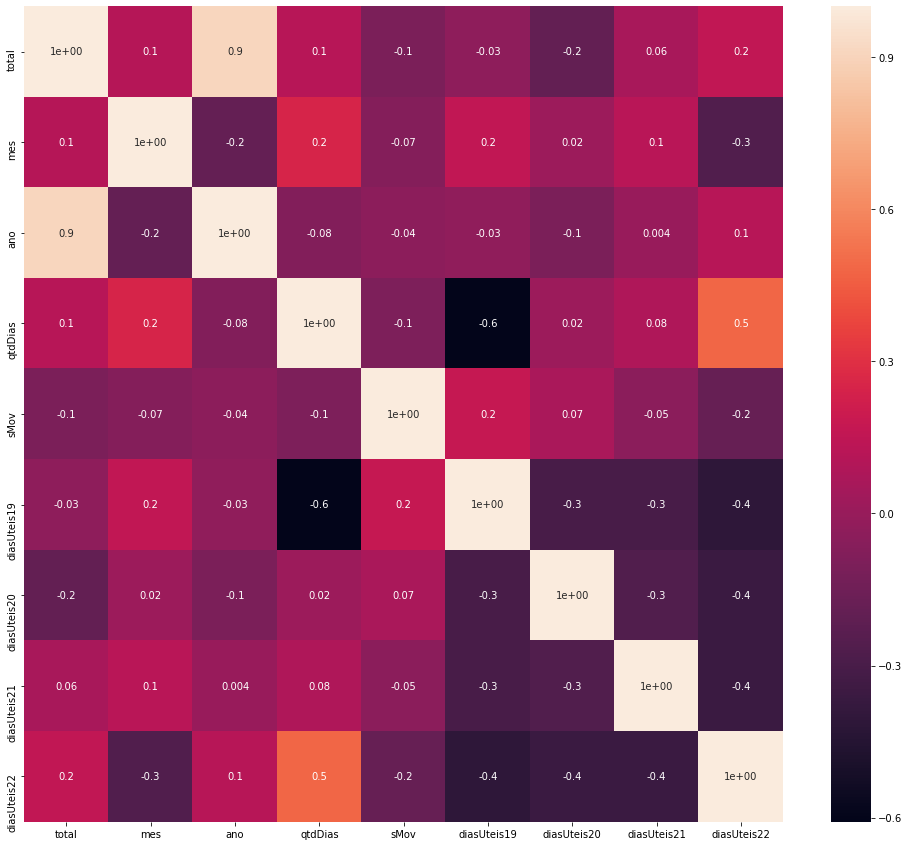

In [4]:
import seaborn as sns
plt.figure(figsize=(17,15))
sns.heatmap(dfMensal.corr(), annot = True, fmt = '.1')

In [5]:
df2 = dfMensal.loc[dfMensal.data > '2017-12-31']
x2 = df2[['mes', 'ano', 'qtdDias', 'sMov', 'diasUteis19', 'diasUteis20', 'diasUteis21', 'diasUteis22']]
y2 = df2['total']
len(x2), len(y2)

(19, 19)

In [6]:
x2 = dfMensal[['mes', 'ano', 'qtdDias', 'sMov', 'diasUteis19', 'diasUteis20', 'diasUteis21', 'diasUteis22']]
y2 = dfMensal['total']
len(x2), len(y2)

(43, 43)

In [87]:
from sklearn.model_selection import train_test_split

SEED = 5
np.random.seed(SEED)
x2_treino, x2_teste, y2_treino, y2_teste = train_test_split(x2, y2, test_size = 0.30, random_state = SEED)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(x2_treino), len(x2_teste)))

Treinaremos com 30 elementos e testaremos com 13 elementos


In [88]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

lr_model2 = LinearRegression()
lr_model2.fit(x2_treino, y2_treino)
print('R² = {}'.format(lr_model2.score(x2_treino, y2_treino).round(3)))
y2_previsto = lr_model2.predict(x2_teste)
print('R² = %s' % metrics.r2_score(y2_teste, y2_previsto).round(3))

R² = 0.94
R² = 0.907


In [89]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from lightgbm import LGBMRegressor

lgb_model2 = LGBMRegressor()
lgb_model2.fit(x2_treino, y2_treino)
print('R² = {}'.format(lgb_model2.score(x2_treino, y2_treino).round(3)))
y2_previsto = lgb_model2.predict(x2_teste)
print('R² = %s' % metrics.r2_score(y2_teste, y2_previsto).round(3))

R² = -0.0
R² = -0.08


In [90]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost.sklearn import XGBRegressor

xgb_model2 = XGBRegressor()
xgb_model2.fit(x2_treino, y2_treino)
print('R² = {}'.format(xgb_model2.score(x2_treino, y2_treino).round(3)))
y2_previsto = xgb_model2.predict(x2_teste)
print('R² = %s' % metrics.r2_score(y2_teste, y2_previsto).round(3))

[17:59:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R² = 0.996
R² = 0.904


c:\users\ramon.nascimento\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [91]:
lr_pred2 = lr_model2.predict(x2_teste)
lgb_pred2 = lgb_model2.predict(x2_teste)
xgb_pred2 = xgb_model2.predict(x2_teste)

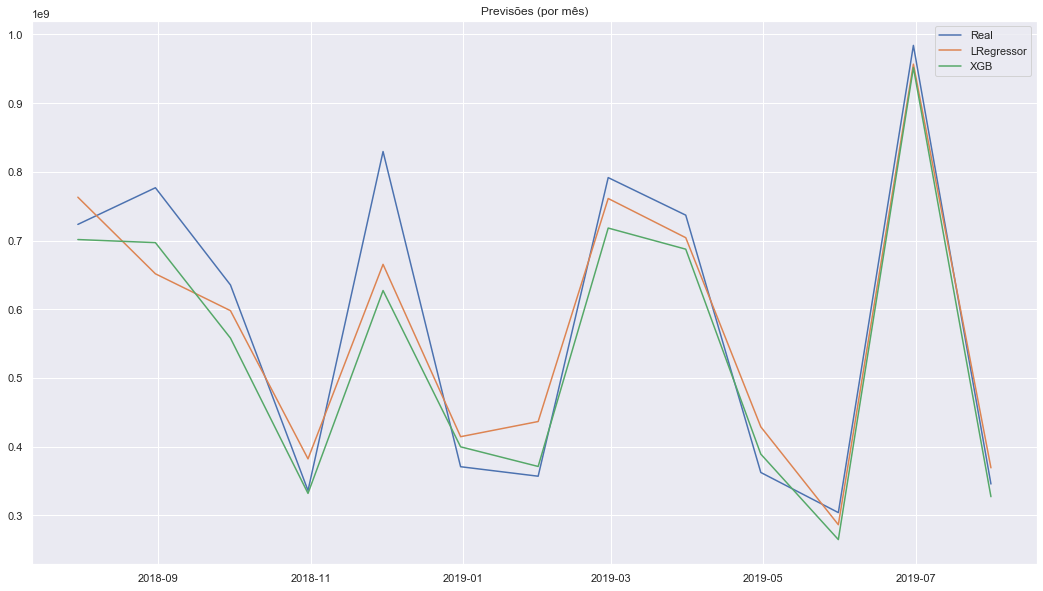

In [93]:
plt.figure(figsize=(18, 10))
#plt.plot(dados.data[-35:], dados.totalTrsc[-35:])
plt.plot(dfMensal.data[-13:], y2_teste[-13:], label='Real')
plt.plot(dfMensal.data[-13:], lr_pred2[-13:], label='LRegressor')
#plt.bar(dfMensal.data[-13:], lgb_pred2[-13:])
plt.plot(dfMensal.data[-13:], xgb_pred2[-13:], label='XGB')
plt.title('Previsões (por mês)')
plt.legend()
plt.grid(True)
plt.show()

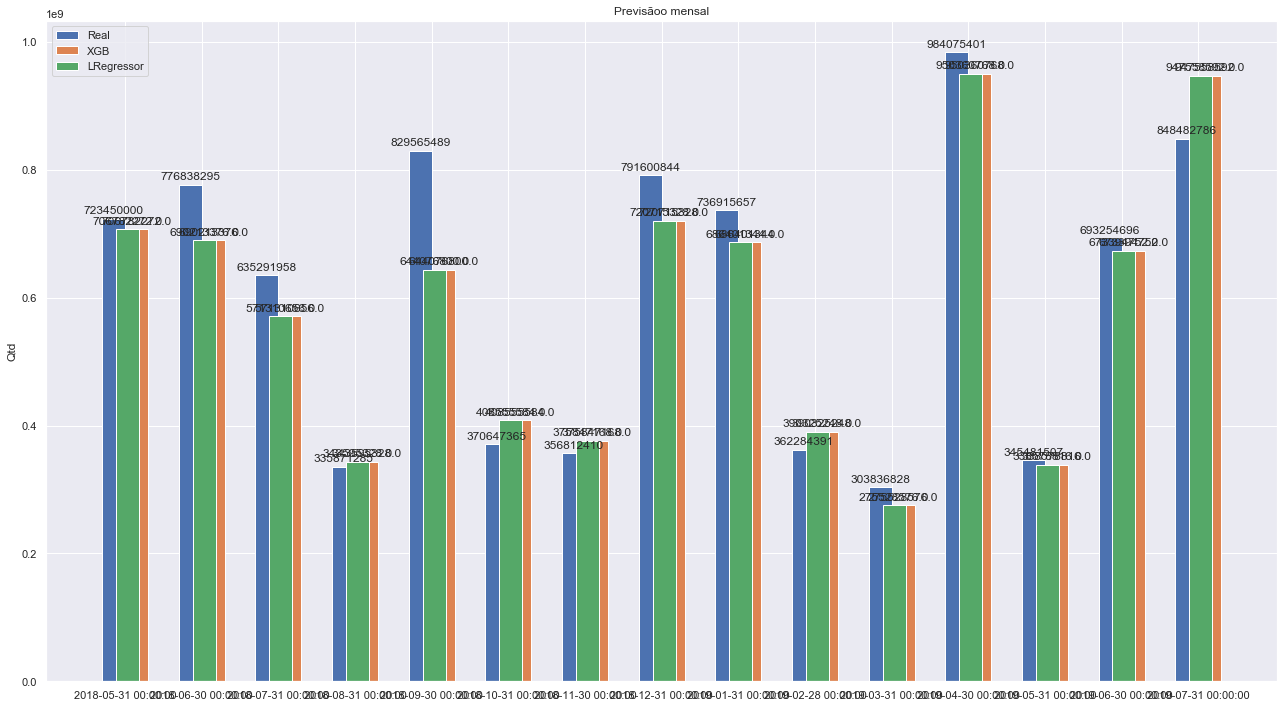

In [22]:
x = np.arange(len(dfMensal.data[-15:]))
width = 0.30

fig, ax = plt.subplots()
ax.figure.set_size_inches(18,10)
rects1 = ax.bar(x - width/2, y2_teste, width, label='Real')
rects2 = ax.bar(x + width/2, xgb_pred2, width, label='XGB')
rects3 = ax.bar(x + width/10, xgb_pred2, width, label='LRegressor')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Qtd')
ax.set_title('Previsãoo mensal')
ax.set_xticks(np.arange(len(dfMensal.data[-15:])))
ax.set_xticklabels(dfMensal.data[-15:])
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()

In [94]:
pMeses = [1,2,3,4,5,6,7,8,9,10,11,12]
pAnos = [2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019]
pQtdDias = [31,28,31,30,31,30,31,31,30,31,30,31]
pMovS = [1,1,1,0,0,0,0,0,0,1,1,1]
pDiasUteis19 = []
pDiasUteis20 = []
pDiasUteis21 = []
pDiasUteis22 = []

for i in range(len(pMeses)):
    if(cal.get_working_days_delta(date(pAnos[i],pMeses[i],1), date(pAnos[i],pMeses[i],pQtdDias[i])) == 19):
        pDiasUteis19.append(1)
    else:
        pDiasUteis19.append(0)
for i in range(len(pMeses)):
    if(cal.get_working_days_delta(date(pAnos[i],pMeses[i],1), date(pAnos[i],pMeses[i],pQtdDias[i])) == 20):
        pDiasUteis20.append(1)
    else:
        pDiasUteis20.append(0)
for i in range(len(pMeses)):       
    if(cal.get_working_days_delta(date(pAnos[i],pMeses[i],1), date(pAnos[i],pMeses[i],pQtdDias[i])) == 21):
        pDiasUteis21.append(1)
    else:
        pDiasUteis21.append(0)
for i in range(len(pMeses)):   
    if(cal.get_working_days_delta(date(pAnos[i],pMeses[i],1), date(pAnos[i],pMeses[i],pQtdDias[i])) == 22):
        pDiasUteis22.append(1)
    else:
        pDiasUteis22.append(0)
    
# print(pDiasUteis19)
# print(pDiasUteis20)
# print(pDiasUteis21)
# print(pDiasUteis22)

entrada2 = []
lr_predict2 = []
xgb_predict2 = []
for i in range(len(pMeses)):
    entrada2.append([[pMeses[i], pAnos[i], pQtdDias[i], pMovS[i], pDiasUteis19[i], pDiasUteis20[i], pDiasUteis21[i], pDiasUteis22[i]]])
    lr_predict2.append(int(lr_model2.predict(entrada2[i])[0]))
    #xgb_predict2.append(int(xgb_model2.predict(entrada2[i])[0]))
    print('Mes: {:02d} LRegressor: {}'.format(pMeses[i], lr_predict2[i]))
    #print('Mes: {:02d} XGBRegressor: {}'.format(pMeses[i], xgb_predict2[i]))

Mes: 01 LRegressor: 828622586
Mes: 02 LRegressor: 761186608
Mes: 03 LRegressor: 806547299
Mes: 04 LRegressor: 888330589
Mes: 05 LRegressor: 926410407
Mes: 06 LRegressor: 867430925
Mes: 07 LRegressor: 956776832
Mes: 08 LRegressor: 970784420
Mes: 09 LRegressor: 964246650
Mes: 10 LRegressor: 965271496
Mes: 11 LRegressor: 941277483
Mes: 12 LRegressor: 994462297


In [95]:
df2 = pd.DataFrame([1,2,3,4,5,6,7,8,9,10,11,12], columns=['mes'])
df2['qtdReal'] = [828355205,791600844,825473605,897052141,959008481,848482786,984075401,0,0,0,0,0]
df2['qtdPrev'] = lr_predict2
df2

,mes,qtdReal,qtdPrev
0,1,828355205,828622586
1,2,791600844,761186608
2,3,825473605,806547299
3,4,897052141,888330589
4,5,959008481,926410407
5,6,848482786,867430925
6,7,984075401,956776832
7,8,0,970784420
8,9,0,964246650
9,10,0,965271496


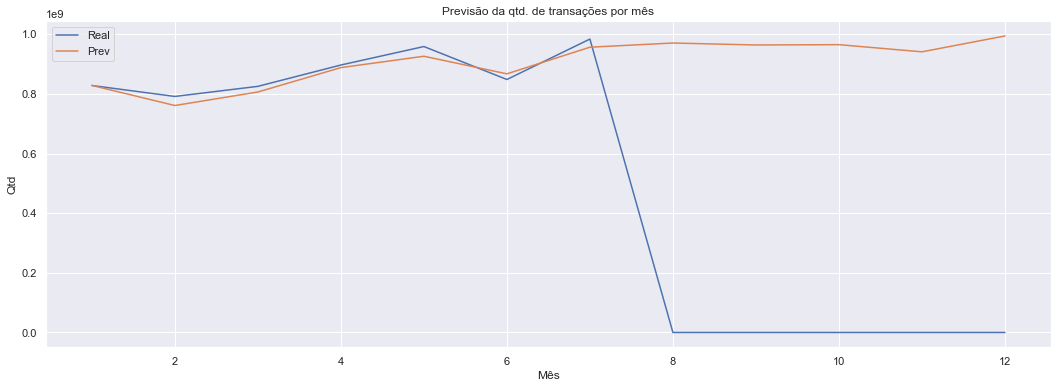

In [96]:
#import seaborn as sns
sns.set(style='darkgrid')

plt.figure(figsize=(18, 6))
ax = sns.lineplot(x='mes', y='qtdReal', data=df2, label='Real')
ax = sns.lineplot(x='mes', y='qtdPrev', data=df2, label='Prev')
ax.set_title('Previsão da qtd. de transações por mês')
ax.set_xlabel('Mês')
ax.set_ylabel('Qtd')
ax.legend()

ax = ax